In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
#df = pd.read_csv("C:/Users/Andrea/Desktop/Decision Tree/iris.csv")

In [3]:
from sklearn.datasets import load_iris

iris = load_iris()
X, y = iris.data, iris.target

In [4]:
print(iris.target_names)


['setosa' 'versicolor' 'virginica']


Create pandas DataFrame from the data and use feature names as collumn names 

In [5]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.columns


Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [6]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


 Question 01 - Calculate the statistis (mean and standard deviation)
 

In [8]:
#Calculate the statistics (mean and standard deviation)

df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Question 2 How many examples of each class are there ?


In [9]:
target = pd.DataFrame( iris.target)
target= target.rename(columns = { 0 : 'target'}) 
target.info()

target.value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   target  150 non-null    int32
dtypes: int32(1)
memory usage: 728.0 bytes


target
0         50
1         50
2         50
dtype: int64

In [10]:
iris.target.sum()

150

In [11]:
target.tail(10)

,target
140,2
141,2
142,2
143,2
144,2
145,2
146,2
147,2
148,2
149,2


Before building the model, let's split the dataset into two : 70% for training and 30 % for testing 

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=0)

We can now build a decision tree on this data :

In [13]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

[Text(0.4, 0.9, 'x[2] <= 2.35\ngini = 0.664\nsamples = 105\nvalue = [34, 32, 39]'),
 Text(0.3, 0.7, 'gini = 0.0\nsamples = 34\nvalue = [34, 0, 0]'),
 Text(0.5, 0.7, 'x[2] <= 4.95\ngini = 0.495\nsamples = 71\nvalue = [0, 32, 39]'),
 Text(0.2, 0.5, 'x[3] <= 1.65\ngini = 0.161\nsamples = 34\nvalue = [0, 31, 3]'),
 Text(0.1, 0.3, 'gini = 0.0\nsamples = 30\nvalue = [0, 30, 0]'),
 Text(0.3, 0.3, 'x[1] <= 3.1\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.2, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.4, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.8, 0.5, 'x[3] <= 1.75\ngini = 0.053\nsamples = 37\nvalue = [0, 1, 36]'),
 Text(0.7, 0.3, 'x[3] <= 1.65\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.6, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.8, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.9, 0.3, 'gini = 0.0\nsamples = 33\nvalue = [0, 0, 33]')]

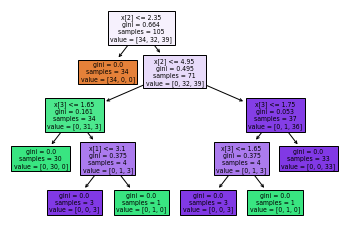

In [14]:
tree.plot_tree(clf, filled=True)

In [15]:
clf.predict(X_test)

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0])

In [16]:
clf.score(X_test, y_test)

0.9777777777777777

Question 3 : Change the max_depth and min_samples_leaf parameter values, what do you notice



In [17]:
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [19]:
y_pred = clf.predict(X_test)

In [20]:
from sklearn.metrics import accuracy_score
accuracy_score( y_test, y_pred)

0.9777777777777777

In [21]:
clf = tree.DecisionTreeClassifier(max_depth = 3)

In [22]:
clf.fit(X_train, y_train)
print(clf)

DecisionTreeClassifier(max_depth=3)


[Text(0.375, 0.875, 'x[3] <= 0.75\ngini = 0.664\nsamples = 105\nvalue = [34, 32, 39]'),
 Text(0.25, 0.625, 'gini = 0.0\nsamples = 34\nvalue = [34, 0, 0]'),
 Text(0.5, 0.625, 'x[2] <= 4.95\ngini = 0.495\nsamples = 71\nvalue = [0, 32, 39]'),
 Text(0.25, 0.375, 'x[3] <= 1.65\ngini = 0.161\nsamples = 34\nvalue = [0, 31, 3]'),
 Text(0.125, 0.125, 'gini = 0.0\nsamples = 30\nvalue = [0, 30, 0]'),
 Text(0.375, 0.125, 'gini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.75, 0.375, 'x[2] <= 5.05\ngini = 0.053\nsamples = 37\nvalue = [0, 1, 36]'),
 Text(0.625, 0.125, 'gini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.875, 0.125, 'gini = 0.0\nsamples = 33\nvalue = [0, 0, 33]')]

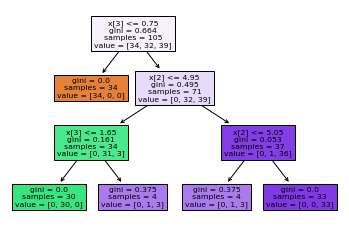

In [23]:
tree.plot_tree(clf, filled=True)

In [24]:
clf.score(X_train, y_train)

0.9809523809523809

In [25]:
clf.score(X_test, y_test)

0.9777777777777777

Overfitting can take place for large depth values, thereby making sure that the tree perfectly predicts all of the train data but leads to poor generalization perforance for the new data. In order to prevent overfitting of the data we should limit the depth of the tree by setting a maximum value for max_depth. 

In [26]:
# When we assign a value for min_samples_leaf

clf = tree.DecisionTreeClassifier(min_samples_leaf= 1)

In [27]:
clf.fit(X_train, y_train)
print(clf)

DecisionTreeClassifier()


[Text(0.4, 0.9, 'x[2] <= 2.35\ngini = 0.664\nsamples = 105\nvalue = [34, 32, 39]'),
 Text(0.3, 0.7, 'gini = 0.0\nsamples = 34\nvalue = [34, 0, 0]'),
 Text(0.5, 0.7, 'x[2] <= 4.95\ngini = 0.495\nsamples = 71\nvalue = [0, 32, 39]'),
 Text(0.2, 0.5, 'x[3] <= 1.65\ngini = 0.161\nsamples = 34\nvalue = [0, 31, 3]'),
 Text(0.1, 0.3, 'gini = 0.0\nsamples = 30\nvalue = [0, 30, 0]'),
 Text(0.3, 0.3, 'x[1] <= 3.1\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.2, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.4, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.8, 0.5, 'x[3] <= 1.75\ngini = 0.053\nsamples = 37\nvalue = [0, 1, 36]'),
 Text(0.7, 0.3, 'x[3] <= 1.65\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.6, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.8, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.9, 0.3, 'gini = 0.0\nsamples = 33\nvalue = [0, 0, 33]')]

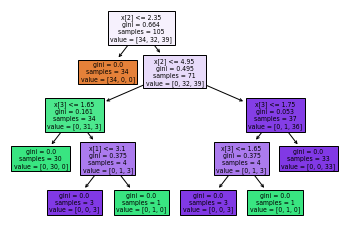

In [28]:
tree.plot_tree(clf, filled=True)

In [29]:
clf.score(X_train, y_train)

1.0

In [30]:
clf.score(X_test, y_test)

0.9777777777777777

min_samples_leaf is the minimum number of samples required to be at a leaf node. This parameter is similar to min_samples_splits, however, this describe the minimum number of samples of samples at the leafs, the base of the tree.

Question 4: The problem here being particularly simple, redo a training/test division with
5% of the data in training and 95% test. Calculate the rate of misclassified items on the test
set. Vary (or better, perform a grid search with GridSearchCV) the values of the max_depth
and min_samples_leaf parameters to measure their impact on this score.

We are building a model with 5% training data and 95% testing data 

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.05, random_state=47)

We can now build a decision tree on this data:

In [32]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

[Text(0.4, 0.8333333333333334, 'x[3] <= 0.8\ngini = 0.653\nsamples = 7\nvalue = [2, 3, 2]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 2\nvalue = [2, 0, 0]'),
 Text(0.6, 0.5, 'x[2] <= 5.25\ngini = 0.48\nsamples = 5\nvalue = [0, 3, 2]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 3\nvalue = [0, 3, 0]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]')]

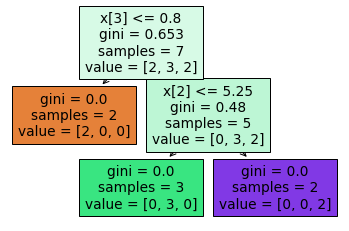

In [33]:
tree.plot_tree(clf, filled=True)

In [34]:
clf.predict(X_test)

array([0, 0, 1, 0, 0, 2, 1, 2, 1, 0, 2, 0, 1, 2, 1, 2, 1, 0, 0, 0, 2, 1,
       1, 1, 2, 2, 1, 2, 0, 0, 2, 1, 2, 0, 1, 0, 0, 0, 1, 0, 1, 0, 2, 0,
       2, 0, 2, 0, 2, 1, 0, 1, 2, 1, 0, 0, 1, 2, 2, 0, 0, 0, 1, 1, 0, 0,
       2, 2, 1, 0, 1, 2, 2, 2, 0, 1, 0, 1, 0, 1, 2, 2, 1, 2, 2, 1, 2, 1,
       1, 0, 1, 0, 1, 0, 2, 1, 1, 1, 0, 2, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1])

In [35]:
clf.score(X_test, y_test)

0.8741258741258742

In [39]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [40]:
from sklearn.metrics import accuracy_score
def scores(dt):
    y_train_pred = dt.predict(X_train)
    y_test_pred = dt.predict(X_test)
    train_score = accuracy_score(y_train, y_train_pred)
    test_score=  accuracy_score(y_test, y_test_pred)
    print("train_score", train_score)
    print("test_score", test_score)

In [41]:
kfold = KFold(n_splits = 5, random_state = 47, shuffle = True)


In [42]:
# Create the parameter grid based on the results of random search
params = {
    'max_depth': [2,3, 5, 16, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
    
}

In [43]:
dt = tree.DecisionTreeClassifier()

In [44]:
#Instantiate the grid search model 
grid_search = GridSearchCV( estimator = dt,
                          param_grid = params,
                          cv = kfold, n_jobs = 1, verbose = 1, scoring = "accuracy")

In [45]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=47, shuffle=True),
             estimator=DecisionTreeClassifier(), n_jobs=1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 16, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=1)

In [46]:
score_df = pd.DataFrame(grid_search.cv_results_)
print(score_df)

    mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.000799      0.001599         0.001599        0.001958   
1        0.001599      0.001958         0.000016        0.000031   
2        0.001599      0.003198         0.000000        0.000000   
3        0.000000      0.000000         0.001302        0.002604   
4        0.000000      0.000000         0.003200        0.003919   
5        0.000000      0.000000         0.001598        0.003197   
6        0.000000      0.000000         0.001599        0.003197   
7        0.000000      0.000000         0.001605        0.003210   
8        0.001599      0.003197         0.000000        0.000000   
9        0.000000      0.000000         0.000000        0.000000   
10       0.000000      0.000000         0.000000        0.000000   
11       0.000000      0.000000         0.001599        0.003197   
12       0.001599      0.003199         0.000000        0.000000   
13       0.001599      0.003198         0.000000

In [47]:
dt_1 = grid_search.best_estimator_
dt_1

DecisionTreeClassifier(max_depth=2, min_samples_leaf=5)

In [48]:
score_df.nlargest(1, "mean_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000799,0.001599,0.001599,0.001958,gini,2,5,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.0,0.5,0.0,0.0,0.0,0.1,0.2,1


In [49]:
grid_search.best_params_

{'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 5}

In [50]:
grid_search.best_score_

0.1

In [51]:
grid_search.param_grid

{'max_depth': [2, 3, 5, 16, 20],
 'min_samples_leaf': [5, 10, 20, 50, 100],
 'criterion': ['gini', 'entropy']}

In [52]:
scores(dt_1)

train_score 0.42857142857142855
test_score 0.32867132867132864


5. Display of the decision surface
For a pair of attributes, i.e., for two-dimensional observations, we can visualize the decision
surface in 2 dimensions. First, we discretize the two-dimensional domain with a constant
step and then we evaluate the model on each point of the grid.
In this example, we only keep the length and width of the petals.

In [53]:
import numpy as np
import matplotlib.pyplot as plt
# Settings
n_classes = 3
plot_colors = "bry" # blue-red-yellow
plot_step = 0.02
# Choose the length and width attributes of the petals
pair = [2, 3]
# We only keep the two attributes
X = iris.data[:, pair]
y = iris.target

(0.0, 7.88, -0.9, 3.4800000000000044)

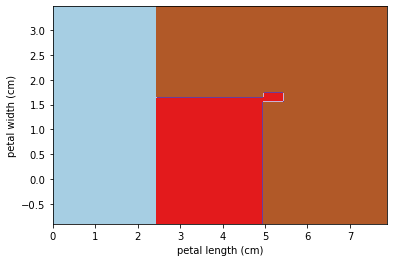

In [54]:
# Tree learning
clf = tree.DecisionTreeClassifier().fit(X, y)
# Display of the decision surface
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), np.arange(y_min,
y_max, plot_step))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.xlabel(iris.feature_names[pair[0]])
plt.ylabel(iris.feature_names[pair[1]])
plt.axis("tight")

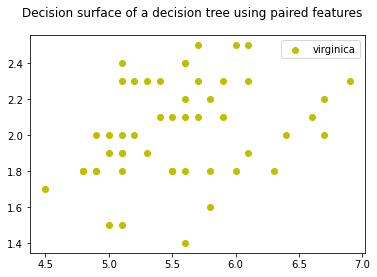

In [55]:
# Display of learning points
for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y == i)
plt.scatter(X[idx, 0], X[idx, 1], c=color,
label=iris.target_names[i], cmap=plt.cm.Paired)
plt.axis("tight")
plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend()
plt.show()

Question 5: Redo the display for the other pairs of attributes. On which pair is the
separation between the classes the most marked?

6. Decision trees for regression
For regression with decision trees, scikit-learn offers the DecisionTreeRegressor class. As
for the classification, the fit(...) method takes as input the parameter X (attributes of the
observations). Warning: the y are not class labels but real values.

In [56]:
from sklearn import tree
X = [[0, 0], [2, 2]]
y = [0.5, 2.5]

In [57]:
clf = tree.DecisionTreeRegressor()
clf = clf.fit(X, y)
clf.predict([[1, 1]])

array([0.5])

In the following example, we will construct a sinusoidal signal affected by white noise and
we will train a regression tree on this training data

Text(0.5, 1.0, 'Noisy sine wave')

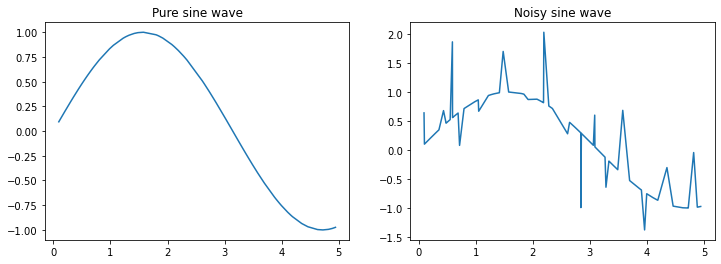

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
# Create the training data
np.random.seed(0)
X = np.sort(5 * np.random.rand(80, 1), axis=0)
y = np.sin(X).ravel()
fig = plt.figure(figsize=(12, 4))
fig.add_subplot(121)
plt.plot(X, y)
plt.title("Pure sine wave")
# We add a random noise every 5 samples
y[::5] += 3 * (0.5 - np.random.rand(16))
fig.add_subplot(122)
plt.plot(X, y)
plt.title("Noisy sine wave")

The objective is to regress this signal y from the values of x. For this, we use a regression
tree.

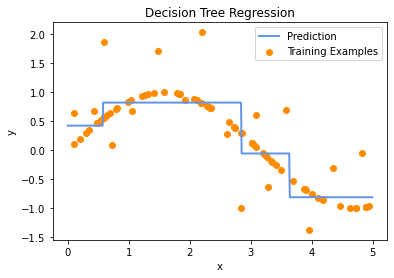

In [59]:
 #Learn the model
reg = DecisionTreeRegressor(max_depth=2)
reg.fit(X, y)
# Prediction on the same range of values
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_pred = reg.predict(X_test)
# Display of results
plt.figure()
plt.scatter(X, y, c="darkorange", label="Training Examples")
8
plt.plot(X_test, y_pred, color="cornflowerblue", label="Prediction",
linewidth=2)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

Question 6: Change the value of the max_depth parameter. What happens if we take too
large a value? Too small? Change the rate of elements affected by noise (the y[::5]). When
all elements are affected by noise, should a high or low value for max_depth be preferred?

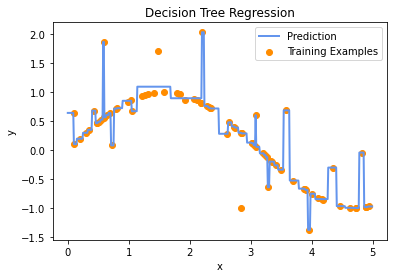

In [60]:
# Changing the max_depth parameter (checking for a small and a large value for max_depth)
#Learn the model
reg = DecisionTreeRegressor(max_depth=9)
reg.fit(X, y)
# Prediction on the same range of values
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_pred = reg.predict(X_test)
# Display of results
plt.figure()
plt.scatter(X, y, c="darkorange", label="Training Examples")
8
plt.plot(X_test, y_pred, color="cornflowerblue", label="Prediction",
linewidth=2)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

When all the elements are affected by noise , a smaller value for max_depth must be considered.

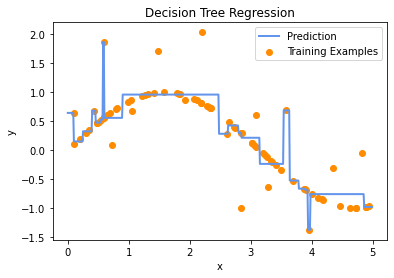

In [61]:
# Changing the max_depth parameter (checking for a small and a large value for max_depth)
#Learn the model
reg = DecisionTreeRegressor(max_depth= 5)
reg.fit(X, y)
# Prediction on the same range of values
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_pred = reg.predict(X_test)
# Display of results
plt.figure()
plt.scatter(X, y, c="darkorange", label="Training Examples")
8
plt.plot(X_test, y_pred, color="cornflowerblue", label="Prediction",
linewidth=2)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

Question 7: To deepen, load the Diabetes dataset from the sklearn.datasets module and
make a random partition into learning part and test part (70% learning, 30% testing). Build
a regression tree model on this basis. Calculate the root mean square error on the test set.
Do a grid search to find the max_depth parameter value that minimizes this error.

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [63]:
from sklearn.datasets import load_diabetes

X, y = load_diabetes(return_X_y = True)

In [64]:
X.shape

(442, 10)

In [65]:
y.shape

(442,)

In [66]:
X

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]])

In [67]:
y

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [68]:
df1 = pd.DataFrame( X, columns = ["age", "sex", "bmi", "bp", "tc", "ldl", "hdl", "tch", "ltg", "glu"])

print(df1)

          age       sex       bmi        bp        tc       ldl       hdl  \
0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2    0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
..        ...       ...       ...       ...       ...       ...       ...   
437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
438 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
439  0.041708  0.050680 -0.015906  0.017293 -0.037344 -0.013840 -0.024993   
440 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283 -0.028674   
441 -0.045472 -0.044642 -0.073030 -0.081413  0.083740  0.027809  0.173816   

          tch       ltg       glu  
0   -0.002592  0.019907 -0.017646  
1  

In [69]:
df2 = pd.DataFrame(y, columns= ["disease_progression"])
print(df2)

     disease_progression
0                  151.0
1                   75.0
2                  141.0
3                  206.0
4                  135.0
..                   ...
437                178.0
438                104.0
439                132.0
440                220.0
441                 57.0

[442 rows x 1 columns]


In [70]:
df_new = pd.merge(df1, df2, left_index = True, right_index = True)

In [71]:
df_new

,age,sex,bmi,bp,tc,ldl,hdl,tch,ltg,glu,disease_progression
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


In [72]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  442 non-null    float64
 1   sex                  442 non-null    float64
 2   bmi                  442 non-null    float64
 3   bp                   442 non-null    float64
 4   tc                   442 non-null    float64
 5   ldl                  442 non-null    float64
 6   hdl                  442 non-null    float64
 7   tch                  442 non-null    float64
 8   ltg                  442 non-null    float64
 9   glu                  442 non-null    float64
 10  disease_progression  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [73]:
df_new.describe()

,age,sex,bmi,bp,tc,ldl,hdl,tch,ltg,glu,disease_progression
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-1.444295e-18,2.543215e-18,-2.255925e-16,-4.854086e-17,-1.428596e-17,3.898811e-17,-6.028360e-18,-1.788100e-17,9.243486e-17,1.351770e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


In [74]:
df_new.isnull().sum()

age                    0
sex                    0
bmi                    0
bp                     0
tc                     0
ldl                    0
hdl                    0
tch                    0
ltg                    0
glu                    0
disease_progression    0
dtype: int64

Implementing the Decision Tree for Diabetes dataset

We are going to split the dataset into train and test dataset as 70% learning and 30% testing

In [75]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=0)

We now build a decision tree on this data 

In [76]:
from sklearn import tree
clf = tree.DecisionTreeRegressor()
clf = clf.fit(X, y)

[Text(0.5344324802580893, 0.9761904761904762, 'x[8] <= -0.004\nsquared_error = 5929.885\nsamples = 442\nvalue = 152.133'),
 Text(0.3103291923472008, 0.9285714285714286, 'x[2] <= 0.006\nsquared_error = 3240.821\nsamples = 218\nvalue = 109.986'),
 Text(0.2100587442218798, 0.8809523809523809, 'x[6] <= 0.021\nsquared_error = 2143.968\nsamples = 171\nvalue = 96.31'),
 Text(0.1182909604519774, 0.8333333333333334, 'x[5] <= 0.091\nsquared_error = 2856.847\nsamples = 87\nvalue = 108.805'),
 Text(0.09200051361068311, 0.7857142857142857, 'x[1] <= 0.003\nsquared_error = 2496.899\nsamples = 85\nvalue = 105.682'),
 Text(0.04558294812532101, 0.7380952380952381, 'x[3] <= -0.035\nsquared_error = 2955.72\nsamples = 39\nvalue = 118.846'),
 Text(0.027221366204417053, 0.6904761904761905, 'x[0] <= -0.051\nsquared_error = 2357.959\nsamples = 21\nvalue = 100.429'),
 Text(0.012326656394453005, 0.6428571428571429, 'x[3] <= -0.092\nsquared_error = 2049.0\nsamples = 8\nvalue = 133.5'),
 Text(0.01027221366204417, 

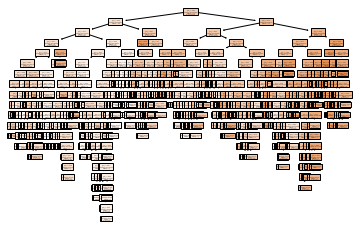

In [77]:
tree.plot_tree(clf, filled=True)

In [78]:
y_pred = clf.predict(X_test)
print(y_pred)

[321. 215. 127.  64. 175. 275. 179. 232. 142.  99. 252. 174. 129.  74.
 264.  49.  86.  75. 101. 155. 170. 276. 110. 136.  68. 128. 103.  93.
 191. 196. 217. 181. 168. 200. 219. 281. 151. 257.  49. 198.  96. 179.
  95. 198. 244.  89. 214. 182.  84. 270. 156. 138. 113. 131. 195. 171.
 122.  61. 230. 235.  52. 121. 144. 107. 132. 302.  53. 317. 137.  57.
  98. 170.  88.  90.  67. 163. 104. 186. 180. 283. 141. 150.  47. 297.
 104.  49. 103. 142.  59.  85. 137.  53.  51. 197. 135.  72. 208. 237.
 145. 110. 292.  97. 197. 158. 163.  63. 192. 233.  68. 160. 178.  68.
 109.  94. 118. 275. 275. 127. 281.  71.  42.  71. 128. 272. 135.  51.
 220. 167.  78. 131. 212. 182. 174.]


In [79]:
clf.score(X_test, y_test)

1.0

Calculate the root mean square error on the test set. Do a grid search to find the max_depth parameter value that minimizes this error.

In [80]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [81]:
from sklearn.metrics import accuracy_score
def scores(dx):
    y_train_pred = dx.predict(X_train)
    y_test_pred = dx.predict(X_test)
    train_score = accuracy_score(y_train, y_train_pred)
    test_score=  accuracy_score(y_test, y_test_pred)
    print("train_score", train_score)
    print("test_score", test_score)

In [82]:
kfold = KFold(n_splits = 5, random_state = 47, shuffle = True)


In [83]:
# Create the parameter grid based on the results of random search
params = {
    'max_depth': [2,4,6,9,20],
    'criterion': ["gini", "entropy"]
    
}

In [84]:
dx = tree.DecisionTreeClassifier()

In [85]:
#Instantiate the grid search model 
grid_search = GridSearchCV( estimator = dx,
                          param_grid = params,
                          cv = kfold, n_jobs = 1, verbose = 1, scoring = "accuracy")

In [86]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=47, shuffle=True),
             estimator=DecisionTreeClassifier(), n_jobs=1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 9, 20]},
             scoring='accuracy', verbose=1)

In [87]:
score_df0 = pd.DataFrame(grid_search.cv_results_)
print(score_df0)

   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.002314      0.002261         0.000429        0.000526   
1       0.001599      0.003197         0.004798        0.003917   
2       0.007214      0.001605         0.000801        0.001602   
3       0.007985      0.000019         0.000000        0.000000   
4       0.011200      0.003938         0.001605        0.003209   
5       0.004792      0.003913         0.003203        0.003923   
6       0.011215      0.003901         0.000000        0.000000   
7       0.020707      0.003854         0.000000        0.000000   
8       0.020139      0.003430         0.000000        0.000000   
9       0.017493      0.002833         0.000215        0.000429   

  param_criterion param_max_depth                                     params  \
0            gini               2      {'criterion': 'gini', 'max_depth': 2}   
1            gini               4      {'criterion': 'gini', 'max_depth': 4}   
2            gini     

In [88]:
score_df0.nlargest(1, "mean_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
1,0.001599,0.003197,0.004798,0.003917,gini,4,"{'criterion': 'gini', 'max_depth': 4}",0.0,0.016129,0.0,0.0,0.032787,0.009783,0.013089,1


In [89]:
dx_1 = grid_search.best_estimator_
dx_1

DecisionTreeClassifier(max_depth=4)

In [90]:
grid_search.best_params_

{'criterion': 'gini', 'max_depth': 4}

In [91]:
grid_search.best_score_

0.00978318350079323

In [92]:
grid_search.param_grid

{'max_depth': [2, 4, 6, 9, 20], 'criterion': ['gini', 'entropy']}

In [94]:
scores(dx_1)

train_score 0.11003236245954692
test_score 0.007518796992481203


Interpreting the Root mean squared error for the test data

In [95]:
from sklearn.metrics import mean_squared_error
from math import sqrt
import math

In [96]:
#calculate RMSE 
#sqrt(mean_squared_error(y_test, y_pred))

In [97]:
mse = sklearn.metrics.mean_squared_error(y_test, y_pred)

In [98]:
rmse = math.sqrt(mse)

In [99]:
print(rmse)

0.0
